#Task4: A/B testing to determine a better approach to find customers.
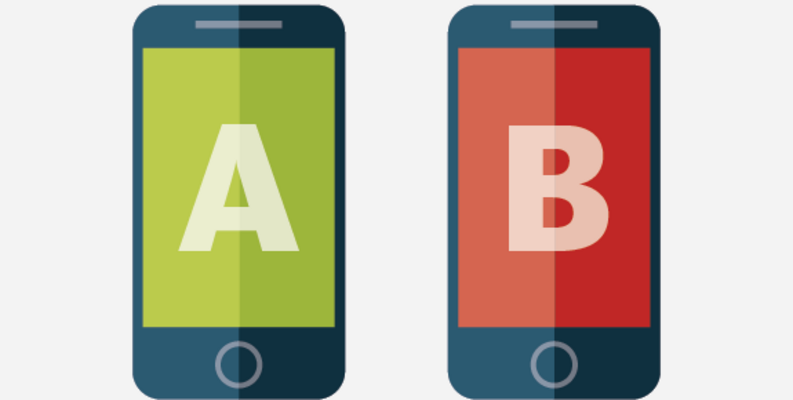

## Problem Statement
A/B testing analysis to evaluate the impact
of a change or intervention. Analyze the results using
statistical techniques and draw actionable insights.



#I. Importing & Visualizing the dataset

In [42]:
!kaggle kernels pull kishantongrao/ab-test-all

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [55]:
import pandas as pd

test_gr = pd.read_csv('test_group.csv',delimiter=';')
control_gr = pd.read_csv('control_group.csv', delimiter=';')

In [56]:
test_gr.head()

control_gr.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
control_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [58]:
print(test_gr.isnull().sum())
print(control_gr.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64


In [59]:
print(test_gr.duplicated().sum())
print(control_gr.duplicated().sum())

0
0


In [60]:
print(test_gr.columns)
print(control_gr.columns)

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')
Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')


       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         30.000000      30.000000            30.000000   
mean   2563.066667      74584.800000   53491.566667          6032.333333   
std     348.687681      32121.377422   28795.775752          1708.567263   
min    1968.000000      22521.000000   10598.000000          3038.000000   
25%    2324.500000      47541.250000   31516.250000          4407.000000   
50%    2584.000000      68853.500000   44219.500000          6242.500000   
75%    2836.250000      99500.000000   78778.750000          7604.750000   
max    3112.000000     133771.000000  109834.000000          8264.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      30.000000          30.000000         30.000000      30.000000  
mean     2418.966667        1858.000000        881.533333     521.233333  
std       388.742312         597.654669        347.584248     211.047745  
min      1854.0

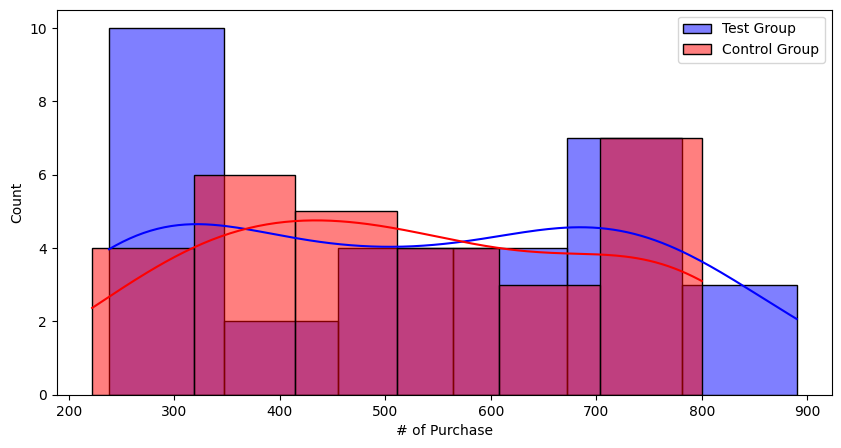

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for test group
print(test_gr.describe())

# Basic statistics for control group
print(control_gr.describe())

# Visualization of key metrics distribution
plt.figure(figsize=(10, 5))
sns.histplot(test_gr['# of Purchase'], color='blue', label='Test Group', kde=True)
sns.histplot(control_gr['# of Purchase'], color='red', label='Control Group', kde=True)
plt.legend()
plt.show()



In [70]:
control_purchases = control_gr['# of Purchase']
test_purchases = test_gr['# of Purchase']

In [73]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(control_purchases, test_purchases)
print("p value : {}".format(p_value))
if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
    print("The Test Campaign significantly outperforms the Control Campaign.")
else:
    print("There is no significant difference between the Test and Control Campaigns.")


p value : nan
There is no significant difference between the Test and Control Campaigns.


# Approach : cost effectiveness

In [74]:
control_cost = control_gr['Spend [USD]'].sum()
test_cost = test_gr['Spend [USD]'].sum()

if test_cost < control_cost:
    print("The Test Campaign is more cost-effective.")
else:
    print("The Control Campaign is more cost-effective or equally cost-effective.")

The Control Campaign is more cost-effective or equally cost-effective.


it suggests that, in terms of cost-efficiency, the Control Campaign may be a preferable choice compared to the Test Campaign.

# Conclusion
  Based on the p-value and the common significance level (alpha) of 0.05, which is often used in A/B testing, we fail to reject the null hypothesis. In other words, there is no strong statistical evidence to suggest that the Test Campaign is performing significantly better or worse than the Control Campaign in terms of the number of purchases.
  Given this result, you might conclude that, for the metric of purchases, there is no compelling reason to prefer the Test Campaign over the Control Campaign. Both campaigns seem to have a similar impact on the number of purchases, at least based on the data you've analyzed.¶